In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', facecolor = 'w')
plt.rc('figure', dpi=100)
plt.rc('font', size=14)
import csky as cy
import healpy as hp
import scipy.stats
import matplotlib.patches as mpatches
#cy.plotting.mrichman_mpl()

In [2]:
sbc = sns.color_palette( n_colors=15
                          )

In [3]:
colors = ['#FF7F0E', '#0B3D53', '#5C9FC9', ]


In [4]:
plot_dir = cy.utils.ensure_dir('/home/ssclafani/plots/paperplots/Fig4')

In [5]:
kra5, _, _, ebins5 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/KRA-gamma_5PeV_maps_energies.tuple.npy', 
                             allow_pickle = True, 
                             encoding='latin1')
kra50, _, _, ebins50 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/KRA-gamma_maps_energies.tuple.npy', 
                               allow_pickle=True, 
                               encoding='latin1')
pi0 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/Fermi-LAT_pi0_map.npy', 
              allow_pickle=True, 
              encoding='latin1')


In [6]:
def get_mids(bin_edges): 
    return bin_edges[:-1] + 0.5*np.diff(bin_edges)

In [7]:
ebins5_ext = np.r_[ebins5, ebins5[-1] * 1.1]
ebins50_ext = np.r_[ebins50, ebins50[-1] * 1.1]


In [8]:
emids5 = get_mids(ebins5_ext)
emids50 = get_mids(ebins50_ext)

In [9]:
dat = np.loadtxt('saved_sens/piecewise_fitresult.txt', skiprows = 13)
x = dat[:,0]
x_err_low = x - dat[:,1]
x_err_high = dat[:,2] - x

# from fit
tnorm = 1.e-8 * (4*np.pi)

y = tnorm * dat[:,3]

y_max = tnorm * dat[:,-1]
y_min = tnorm * dat[:,-2]

y_err_high = y_max - y
y_err_low = y - y_min

indices_UL = np.array([5,8,9, 10, 11, 12])

# visualize upper limits with corresponding marker
y[indices_UL] = y[indices_UL]+y_err_high[indices_UL]

uplims = np.zeros(x.shape)
uplims[[indices_UL]]=True

# plot the points with non-zero best fit (i.e. not upper-limits)
x_new = np.delete(x, indices_UL)
x_err_high_new = np.delete(x_err_high, indices_UL)
x_err_low_new = np.delete(x_err_low, indices_UL)

y_new = np.delete(y, indices_UL)
y_err_high_new = np.delete(y_err_high, indices_UL)
y_err_low_new = np.delete(y_err_low, indices_UL)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [10]:
georg_flux = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_allsky_average_E2Phi_2.7_extrapol.npy', allow_pickle=True)
georg_energy = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_energies.npy', allow_pickle=True)
georg_flux = 0.31* georg_flux

In [11]:
hans_result = np.loadtxt('saved_sens/Cascades_PRL_2010_11_12_13_14_15_pp_nominal_1sigma.txt', skiprows=1)

In [12]:
hans_gammas = hans_result[:,0]
hans_norm = hans_result[:,1]

In [13]:
hans_flux = {}
for i, gamma in enumerate(hans_gammas):
    Es = np.linspace(16000,2.6e6, 1000)
    hans_flux[gamma] =  Es**2*1e-18*hans_norm[i]*((Es/1e5)**(-1*hans_gammas[i]))
    
bestfithans = Es**2*1e-18*1.66*((Es/1e5)**-2.53)

In [14]:
points = np.ndarray((len(hans_gammas), 1000))
xs = np.logspace(4.20411998,6.41497334,1000)

for i, gamma in enumerate(hans_gammas):
    points[i] = np.interp(np.log10(xs) ,np.log10(Es), hans_flux[gamma])
mins = np.min(points, axis=0)
maxs = np.max(points, axis=0)

(5e-10, 1e-06)

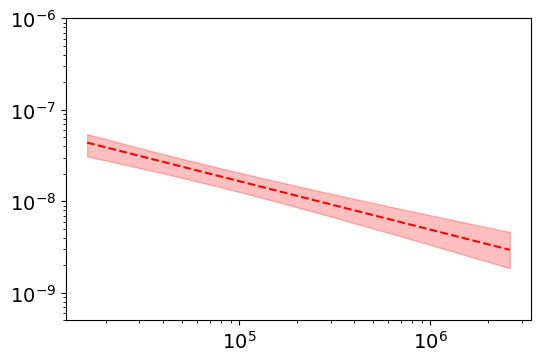

In [15]:
plt.fill_between(xs, mins, maxs, color='r', alpha=0.25)
plt.plot(Es, bestfithans, c='r', ls='--')
plt.loglog()
plt.ylim(5e-10,1e-6)
#plt.xlim(1e4,1e8)

In [16]:
erange_kra5 = [968, 99713]
erange_kra50 = [1019, 145376]
erange_pi0 = [796, 68869]

In [17]:
mask5 = (emids5 > erange_kra5[0]) & (emids5 < erange_kra5[1])
mask50 = (emids50 > erange_kra50[0]) & (emids50 < erange_kra50[1])

maskpi0_georg = (georg_energy > np.log10(erange_pi0[0])) & (georg_energy < np.log10(erange_pi0[1]))

In [18]:
pi0modelnorm = 4.53e-12
pi0_range = [1.69e-11, 2.18e-11, 2.71e-11]
pi0_model_range = np.array(pi0_range) / pi0modelnorm
print(pi0_range)
print(pi0_range[0] - pi0_range[1])
print(pi0_range[2] - pi0_range[1])

[1.69e-11, 2.18e-11, 2.71e-11]
-4.899999999999997e-12
5.3000000000000004e-12


In [19]:
pi0_model_range

array([3.73068433, 4.81236203, 5.98233996])

In [20]:

kra5_range = [.398, .551,  .726]
kra50_range = [.260, .372, 0.500]

In [21]:
print(kra5_range[0] - kra5_range[1])
print(kra5_range[2] - kra5_range[1])

-0.15300000000000002
0.17499999999999993


In [22]:
print(kra50_range[0] - kra50_range[1])
print(kra50_range[2] - kra50_range[1])

-0.11199999999999999
0.128


In [23]:
kra5_plot = emids5**2 *(np.sum(kra5, axis=0)) * hp.nside2pixarea(128)/ 3
xinterp = np.logspace(4,6,2001)
interpvals = np.interp(xinterp, emids5, kra5_plot)
kra_100TeV = kra5_range[1]*interpvals[1000]
print(kra_100TeV)
print(1.66e-8*4*np.pi)

kra_100TeV / (1.66e-8*4*np.pi )

1.5851967156663112e-08
2.0860175219836226e-07


0.07599153405762987

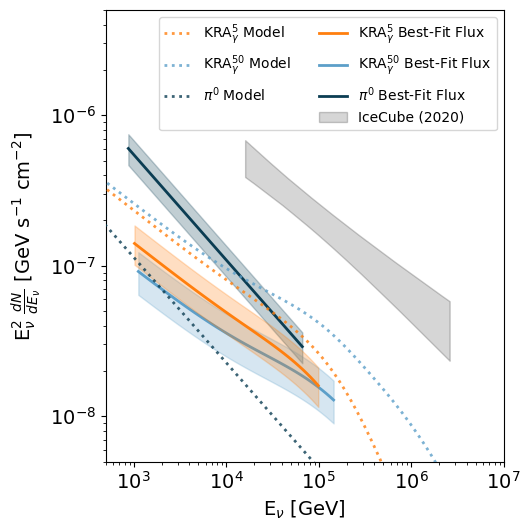

In [24]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot((emids5), ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot((emids50), (emids50)**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.8, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = (emids5)[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(emids5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
ax.fill_between(emids5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=.25, zorder=10)

kra50_plot = emids50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(emids50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
ax.fill_between(emids50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy[maskpi0_georg], 4*np.pi*pi0_model_range[1]*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 4*np.pi*pi0_model_range[0]*georg_flux[maskpi0_georg],
                4*np.pi*pi0_model_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


plt.fill_between(xs, 4*np.pi*mins, 4*np.pi*maxs, color='0.2', alpha=0.2,
                 edgecolor='k', label=r'IceCube (2020)')


alpha=1

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(5e-9,5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'gp_flux')

-> /home/ssclafani/plots/paperplots/Fig4/gp_flux_full


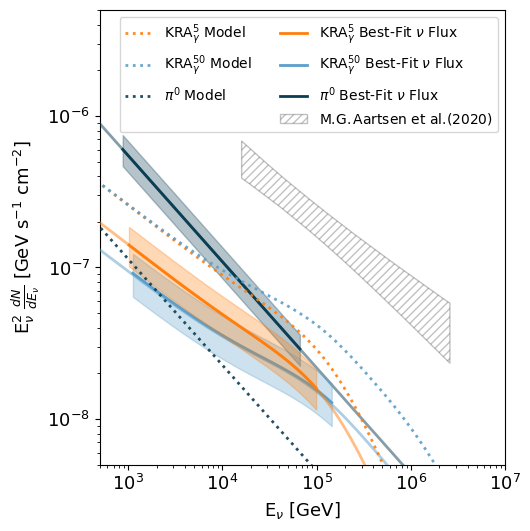

In [25]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(emids5, emids5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot(emids50, emids50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.9, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = emids5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
alpha1 = .15
alpha2 = .5
alpha3 = .3
ax.plot(emids5, kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, alpha=alpha2)
#ax.fill_between(ebins5, kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
#        color = colors[0], alpha=alpha1, zorder=10)

kra50_plot = emids50**2 *(sum(kra50)) * hp.nside2pixarea(128) / 3
ax.plot(ebins50, kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, alpha=alpha2)
#ax.fill_between(ebins50,kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
#        color = colors[2], zorder=5,  alpha=alpha1)

ax.plot(10**georg_energy, pi0_model_range[1]*4*np.pi*georg_flux, 
        lw=2, c=colors[1], ls='-', zorder=3,alpha=alpha2
        )
#ax.fill_between(10**georg_energy, pi0_range[0]*4*np.pi*georg_flux,
#                pi0_range[-1]*4*np.pi*georg_flux, zorder=3, color=colors[1], alpha=alpha1 )


kra5_plot = emids5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(emids5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label=r'KRA$_\gamma^{5}$ Best-Fit $\nu$ Flux')
ax.fill_between(emids5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=alpha3, zorder=10)

kra50_plot = emids50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(emids50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label=r'KRA$_\gamma^{50}$ Best-Fit $\nu$ Flux')
ax.fill_between(emids50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=alpha3)

ax.plot(10**georg_energy[maskpi0_georg], pi0_model_range[1]*4*np.pi*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label=r'$\pi^0$ Best-Fit $\nu$ Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 4*np.pi*pi0_model_range[0]*georg_flux[maskpi0_georg],
                4*np.pi*pi0_model_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=alpha3 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins,4*np.pi* maxs, color='w', alpha=0.3,hatch='////',
                 edgecolor='0.2', label=r'M.G.$\,$Aartsen et al.(2020)')


alpha=1

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(5e-9,5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux_full', dpi=500)

-> /home/ssclafani/plots/paperplots/Fig4/gp_flux_model


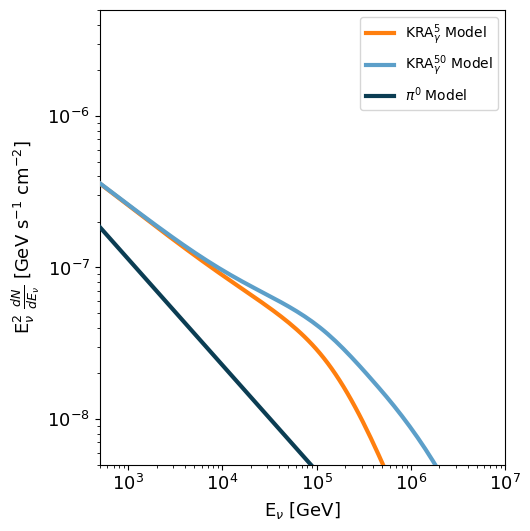

In [26]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(emids5, emids5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls='-', color=colors[0] ,
        lw=3, alpha=1, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot(emids50, emids50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls='-', color=colors[2],
        lw=3, alpha=1, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=3, alpha=1, zorder=100, ls='-', label='$\pi^0$ Model')

alpha=1

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(5e-9,5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=1)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux_model', dpi=500)

-> /home/ssclafani/plots/paperplots/Fig4/gp_flux_proposal


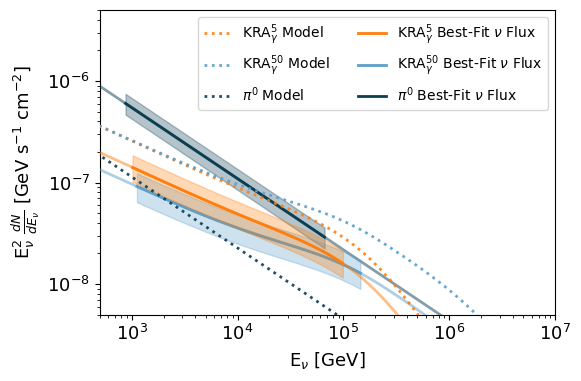

In [27]:
fig , ax = plt.subplots(figsize=(6,4))
plt.rc('font', size=10)
ax.plot(emids5, emids5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot(emids50, emids50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.9, zorder=100, ls=':', label='$\pi^0$ Model')

#ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = emids5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
alpha1 = .15
alpha2 = .5
alpha3 = .3
ax.plot(emids5, kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, alpha=alpha2)
#ax.fill_between(emids5, kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
#        color = colors[0], alpha=alpha1, zorder=10)

kra50_plot = emids50**2 *(sum(kra50)) * hp.nside2pixarea(128) / 3
ax.plot(emids50, kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, alpha=alpha2)
#ax.fill_between(emids50,kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
#        color = colors[2], zorder=5,  alpha=alpha1)

ax.plot(10**georg_energy, pi0_model_range[1]*4*np.pi*georg_flux, 
        lw=2, c=colors[1], ls='-', zorder=3,alpha=alpha2
        )
#ax.fill_between(10**georg_energy, pi0_range[0]*4*np.pi*georg_flux,
#                pi0_range[-1]*4*np.pi*georg_flux, zorder=3, color=colors[1], alpha=alpha1 )


kra5_plot = emids5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(emids5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label=r'KRA$_\gamma^{5}$ Best-Fit $\nu$ Flux')
ax.fill_between(emids5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=alpha3, zorder=10)

kra50_plot = emids50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(emids50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label=r'KRA$_\gamma^{50}$ Best-Fit $\nu$ Flux')
ax.fill_between(emids50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=alpha3)

ax.plot(10**georg_energy[maskpi0_georg], pi0_model_range[1]*4*np.pi*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label=r'$\pi^0$ Best-Fit $\nu$ Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 4*np.pi*pi0_model_range[0]*georg_flux[maskpi0_georg],
                4*np.pi*pi0_model_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=alpha3 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
#plt.fill_between(xs, 4*np.pi*mins,4*np.pi* maxs, color='w', alpha=0.3,hatch='////',
#                 edgecolor='0.2', label=r'M.G.$\,$Aartsen et al.(2020)')


alpha=1

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(5e-9,5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux_proposal', dpi=500)

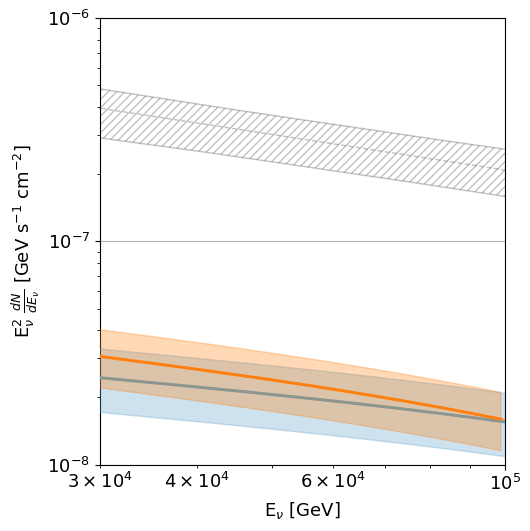

In [28]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
#ax.plot(emids5, emids5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
#        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{5}$ Model')
#ax.plot(emids50, emids50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
#        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{50}$ Model')
#ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
#        lw=2, alpha=0.9, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = emids5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
alpha1 = .15
alpha2 = .5
alpha3 = .3
ax.plot(emids5, kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, alpha=alpha2)
#ax.fill_between(emids5, kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
#        color = colors[0], alpha=alpha1, zorder=10)

kra50_plot = emids50**2 *(sum(kra50)) * hp.nside2pixarea(128) / 3
ax.plot(emids50, kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, alpha=alpha2)
#ax.fill_between(emids50,kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
#        color = colors[2], zorder=5,  alpha=alpha1)

ax.plot(10**georg_energy, pi0_range[1]*4*np.pi*georg_flux, 
        lw=2, c=colors[1], ls='-', zorder=3,alpha=alpha2
        )
#ax.fill_between(10**georg_energy, pi0_range[0]*4*np.pi*georg_flux,
#                pi0_range[-1]*4*np.pi*georg_flux, zorder=3, color=colors[1], alpha=alpha1 )


kra5_plot = emids5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(emids5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label=r'KRA$_\gamma^{5}$ Best-Fit $\nu$ Flux')
ax.fill_between(emids5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=alpha3, zorder=10)

kra50_plot = emids50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(emids50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label=r'KRA$_\gamma^{50}$ Best-Fit $\nu$ Flux')
ax.fill_between(emids50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=alpha3)

ax.plot(10**georg_energy[maskpi0_georg], pi0_range[1]*4*np.pi*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label=r'$\pi^0$ Best-Fit $\nu$ Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], pi0_range[0]*4*np.pi*georg_flux[maskpi0_georg],
                pi0_range[-1]*4*np.pi*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=alpha3 )


plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins,4*np.pi* maxs, color='w', alpha=0.3,hatch='////',
                 edgecolor='0.2', label=r'M.G.$\,$Aartsen et al.(2020)')


alpha=1

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(1e-8,1e-6)
ax.set_xlim(3e4, 1e5)
ax.grid('both')
#plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'gp_flux_full', dpi=500)

In [29]:
kra5_plot = emids5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
pi0_plot = 10**georg_energy[maskpi0_georg], pi0_range[1]*4*np.pi*georg_flux[maskpi0_georg]
kra50_plot = emids50**2 *(sum(kra50)) * hp.nside2pixarea(128)/ 3
xinterp = np.logspace(4,5,51)

pi0_interpvals = np.interp(xinterp, pi0_plot[0], pi0_plot[1])
interpvals = np.interp(xinterp, emids50, kra50_plot)

print(list(zip(xinterp, interpvals)))
#print(list(zip(xinterp, pi0_interpvals)))


[(10000.0, 9.592374682855491e-08), (10471.285480508985, 9.435803180314293e-08), (10964.78196143185, 9.273704963437053e-08), (11481.536214968817, 9.123976255071799e-08), (12022.644346174131, 8.970600794051602e-08), (12589.254117941662, 8.827316104553357e-08), (13182.567385564074, 8.682057791548238e-08), (13803.842646028837, 8.544814111164009e-08), (14454.39770745928, 8.407075621818212e-08), (15135.612484362071, 8.275465896964871e-08), (15848.93192461114, 8.144658313934862e-08), (16595.869074375598, 8.018271920349993e-08), (17378.00828749376, 7.893815309477743e-08), (18197.008586099826, 7.772238872324651e-08), (19054.607179632483, 7.653563392170397e-08), (19952.62314968879, 7.5363819283484e-08), (20892.96130854041, 7.422929342638189e-08), (21877.616239495517, 7.309727757815524e-08), (22908.676527677748, 7.200953480597121e-08), (23988.329190194898, 7.091318430347572e-08), (25118.864315095823, 6.986693940555308e-08), (26302.679918953814, 6.880216010771543e-08), (27542.28703338169, 6.779231

-> /home/ssclafani/plots/paperplots/Fig4/gp_flux_sr


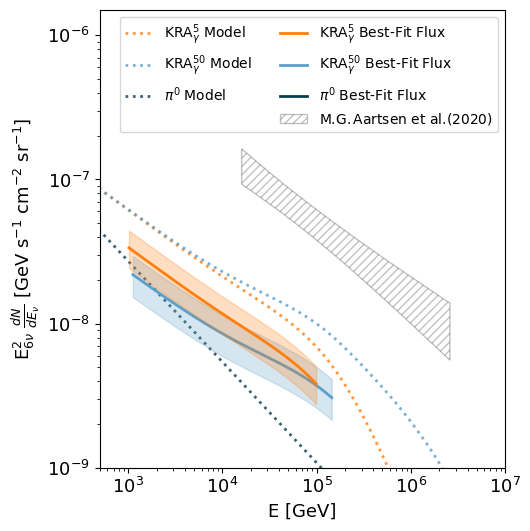

In [30]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(emids5, emids5**2 * (sum(kra5)) * hp.nside2pixarea(128) / (4*np.pi) , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, label='KRA$_\gamma^{5}$ Model')
ax.plot(emids50, emids50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ (4*np.pi), ls=':', color=colors[2],
        lw=2, alpha=0.8, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 3*georg_flux, color=colors[1],
        lw=2, alpha=0.8, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)

kra5_plot = emids5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ (4*np.pi)

ax.plot(emids5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
ax.fill_between(emids5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=.25, zorder=10)

kra50_plot = emids50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / (4*np.pi)
ax.plot(emids50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
ax.fill_between(emids50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy[maskpi0_georg], 3*pi0_range[1]*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 3*pi0_range[0]*georg_flux[maskpi0_georg],
                3*pi0_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 3*mins,3* maxs, color='w', alpha=0.3,hatch='////',
                 edgecolor='0.2', label=r'M.G.$\,$Aartsen et al.(2020)')

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(1e-9,1.5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{6\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$ sr$^{-1}$]')
ax.set_xlabel('E [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux_sr')

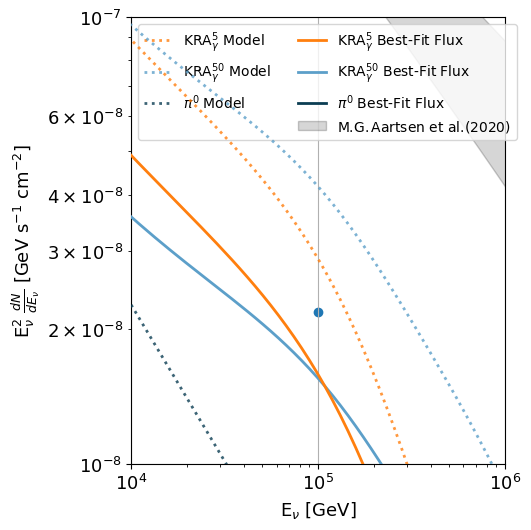

In [31]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(emids5, emids5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot(emids50, emids50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.8, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = emids5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3

ax.plot(emids5, kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
#ax.fill_between(emids5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
#        color = colors[0], alpha=.25, zorder=10)

kra50_plot = emids50**2 *(sum(kra50)) * hp.nside2pixarea(128) / 3
ax.plot(emids50, kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
#ax.fill_between(emids50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
#        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy, pi0_range[1]*4*np.pi*georg_flux, 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
#ax.fill_between(10**georg_energy[maskpi0_georg], pi0_range[0]*4*np.pi*georg_flux[maskpi0_georg],
#                pi0_range[-1]*4*np.pi*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins, 4*np.pi*maxs, color='0.2', alpha=0.2,
                 edgecolor='k', label=r'M.G.$\,$Aartsen et al.(2020)')


#ax.arrow(2000, 1e-8, 19000, 0, width=.5e-9, 
#         length_includes_head = True, head_length=10**4 ,color=colors[0], alpha=0.8)
#ax.arrow(2000, 1e-8, -1000, 0, width=.5e-9, 
#         length_includes_head = True, head_length=10**4 ,color=colors[0], alpha=0.8)
alpha=1
'''ax.annotate(s='', xy=(1295,.8e-8),xycoords='data', xytext=(21155,.8e-8), 
            arrowprops=dict(arrowstyle='<->', facecolor=colors[1], ec=colors[1], alpha=alpha, lw=3), 
             color=colors[2], alpha=0.5)
ax.annotate(s='', xy=(1892,.7e-8), xytext=(37174,.7e-8), 
             arrowprops=dict(arrowstyle='<->', facecolor=colors[0], ec=colors[0], alpha=alpha, lw=3), color=colors[0], alpha=0.5)
ax.annotate(s='', xy=(2084,.6e-8), xytext=(50604,.6e-8), 
             arrowprops=dict(arrowstyle='<->', facecolor=colors[2], ec=colors[2], alpha=alpha, lw=3), 
            color=colors[1], alpha=0.5)

rect=mpatches.Rectangle((1200,.55e-8),50000,.4e-8, 
                        fill = False,
                        #fill_color='w',
                        color = "k",
                        alpha=0.8,
                        linewidth = 1)
                        
ax.text(1180,1.2e-8, 'Data Derived')
ax.text(1180,1e-8, 'Energy Range')
plt.gca().add_patch(rect)'''
plt.loglog()
plt.grid('both')
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(1e-8,1e-7)
ax.set_xlim(1e4, 1e6)
plt.scatter(1e5,2.183e-8)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'gp_flux')

In [32]:
georg_flux = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_allsky_average_E2Phi_2.7_extrapol.npy', allow_pickle=True)
georg_energy = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_energies.npy', allow_pickle=True)

In [33]:
mask = 10**georg_energy > 1e2
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**georg_energy[mask], georg_flux[mask])
print(list(zip(xspace, interp)))

[(80000, 1.3602691060428514e-09), (90000, 1.252524312133e-09), (100000, 1.16363520397475e-09), (110000, 1.0885309049176363e-09), (120000, 1.023477680474604e-09), (130000, 9.673182573948673e-10), (140000, 9.194867575042398e-10), (150000, 8.752851044407279e-10), (160000, 8.371662527399758e-10), (170000, 8.02226185938854e-10), (180000, 7.708212150435702e-10), (190000, 7.420628573598357e-10), (200000, 7.161892501306267e-10), (210000, 6.914214705357652e-10), (220000, 6.701049868082872e-10), (230000, 6.487885030808093e-10), (240000, 6.302388782504701e-10), (250000, 6.126768709710631e-10), (260000, 5.951148636916562e-10), (270000, 5.804257098965315e-10), (280000, 5.659569023940838e-10), (290000, 5.51488094891636e-10), (300000, 5.390110888469008e-10), (310000, 5.270906752397177e-10), (320000, 5.151702616325345e-10), (330000, 5.037841997476357e-10), (340000, 4.939633309205209e-10), (350000, 4.84142462093406e-10), (360000, 4.743215932662912e-10), (370000, 4.6502251476079906e-10), (380000, 4.5693

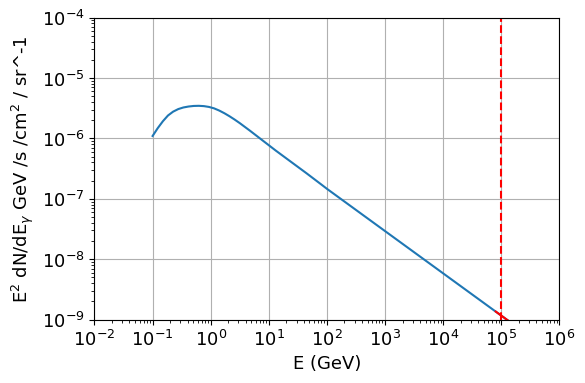

In [34]:
plt.plot(10**georg_energy, georg_flux)
plt.loglog()
plt.axvline(1e5, c='r', ls='--')
plt.ylim(1e-9,1e-4)
plt.xlim(1e-2,1e6)
plt.grid('both')
plt.ylabel('E$^2$ dN/dE$_\gamma$ GeV /s /cm$^2$ / sr^-1')
plt.xlabel('E (GeV)')
plt.plot(xspace, interp, c='r')

In [35]:
mask = 10**georg_energy > 1e2
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**georg_energy[mask], 4*np.pi*0.31*georg_flux[mask])
print(list(zip(xspace, interp)))

[(80000, 5.299030173757227e-09), (90000, 4.879302260025156e-09), (100000, 4.533028082249263e-09), (110000, 4.240453660677424e-09), (120000, 3.987033952994251e-09), (130000, 3.768260714582595e-09), (140000, 3.5819295246360402e-09), (150000, 3.409738674845381e-09), (160000, 3.261243833307093e-09), (170000, 3.1251321864059503e-09), (180000, 3.002791770350927e-09), (190000, 2.8907614342675526e-09), (200000, 2.7899688596200457e-09), (210000, 2.6934841193380705e-09), (220000, 2.6104441605765927e-09), (230000, 2.527404201815115e-09), (240000, 2.4551427490987527e-09), (250000, 2.3867286345151716e-09), (260000, 2.31831451993159e-09), (270000, 2.2610918212453245e-09), (280000, 2.204727498044015e-09), (290000, 2.148363174842705e-09), (300000, 2.099758063386825e-09), (310000, 2.053321199454888e-09), (320000, 2.006884335522951e-09), (330000, 1.9625290787430137e-09), (340000, 1.924271148737689e-09), (350000, 1.886013218732364e-09), (360000, 1.847755288727039e-09), (370000, 1.811530031996708e-09), (3